# **Project Report - Group 37**

## Group members:
- Nadia Khalil Arjomandi
- Savero Lukianto Chandra 
- Brianna De Souza 
- Sophia Sheng

# Income Prediction Analysis: Determining the Likelihood of Earning Over 50,000 dollars Based on Age, Enducational Level, Capital Loss, Capital Gain, and Work Hours

# I. Introduction

The project aims to develop a predictive model/question to determine if a person earns over 50,000 dollars a year, focusing on factors such as age, capital loss, capital gain, work hours per week, and educational level. This question is relevant not only to the project but also to real-world applications in policymaking and marketing (Dechadilok & Suksawang, 2017). The rationale is based on the observation that young adults with lower educational levels, typically with limited disposable income and smaller investments, might have lesser capital gains or losses. In contrast, middle-aged adults with higher educational levels, likely in their peak earning years, may have larger investments and a higher likelihood of exceeding the 50,000-dollar income threshold (Larrimore et al., 2021). Older adults could have diverse financial situations, some accumulating wealth and others with reduced earnings post-retirement. The "Adult" dataset from the 1994 Census, available in the UCI Machine Learning Repository, is used for this analysis. The project's main objective is to accurately identify individuals earning above $50,000 annually, distinguishing between middle and higher-income groups in the U.S. This project aims to understand the determinants of financial success. 

Word count = 179


# II. Methods and Results

## 1) Preliminary Data Analysis

### i. Installing the Required Libraries

In [49]:
library(tidyverse)
library(dplyr)
library(repr)
library(tidymodels)
library(ggplot2)

### ii. Reading the Dataset into R

In [50]:
# The URL that contains the data set.
url <- "https://raw.githubusercontent.com/Syzophia/dsci100-group-37-project/main/adult.data"

# Reading the data set.
adult_data <- read.csv(url) 

# Showing the first 6 rows of the raw data.
head(adult_data)

,X39,State.gov,X77516,Bachelors,X13,Never.married,Adm.clerical,Not.in.family,White,Male,X2174,X0,X40,United.States,X..50K
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


### iii. Wrangling and Cleaning Data into a Tidy Format

#### A. Giving Readable Column Names for the Data Set

In [51]:
# First, we rename the columns to improve the readability of the data frame.

# assigning column names for the data frame.
colnames (adult_data) <- c("age", "workclass", "fnlwgt", "education", "education_level", "marital_status",
                            "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", 
                            "weekly_work_hours", "native_country", "income")
head(adult_data)

,age,workclass,fnlwgt,education,education_level,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,weekly_work_hours,native_country,income
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


#### B. Choosing the Country to Focus on
We focus our classification project on one country, the USA, because in real life, some factors that affect one's income are country-dependent. People in different countries have different difficulties in gaining 50,000 USD.

Word count = 33

In [52]:
# Summarize the count of each country in the data set.
list_of_countries <- adult_data |> 
            group_by(native_country) |> 
            summarize (count = n()) |> 
            arrange(-count)
# In the table below, we can see that most people reside in the US. Afterward, we only take into account the people
# whose native country is the US.
# In the table below, we also found 583 missing points for the native_country variable.
head(list_of_countries)

native_country,count
<chr>,<int>
United-States,29169
Mexico,643
?,583
Philippines,198
Germany,137
Canada,121


In [53]:
# Modifying the data frame so that only the data points having the US as their native country are included.
adult_data |> filter (native_country == "United-States") 
head(adult_data)

age,workclass,fnlwgt,education,education_level,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,weekly_work_hours,native_country,income
<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>


,age,workclass,fnlwgt,education,education_level,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,weekly_work_hours,native_country,income
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


#### C. Selecting Relevant Variables for the Classification Model
To perform the classification algorithm, we need to convert `income` into a `fct` data type and only select numerical variables for the predictors.

Word count = 23

In [54]:
# Selecting the columns associated which numerical variables, continued by converting income into a factor variable.
adult_data <- adult_data |> select (age, education_level, capital_gain, capital_loss, weekly_work_hours, income) |>
                            mutate (income = as_factor(income))
head(adult_data)

,age,education_level,capital_gain,capital_loss,weekly_work_hours,income
,<int>,<int>,<int>,<int>,<int>,<fct>
1,50,13,0,0,13,<=50K
2,38,9,0,0,40,<=50K
3,53,7,0,0,40,<=50K
4,28,13,0,0,40,<=50K
5,37,14,0,0,40,<=50K
6,49,5,0,0,16,<=50K


#### D. Splitting the Data Frame into a Training Set and a Testing Set

In [55]:
set.seed(3278)
# splitting the data frame into a training set and a testing set.
# in this project, 70% data is used as the training set.
adult_split <- initial_split (adult_data, prop = 0.7, strata = income)
adult_training <- training(adult_split)
adult_testing <- testing (adult_split)

#### E. Summarizing the Key Features in the Training Data Set
1) **Table 1: Number of observations and variables**

In [56]:
dimension <- tibble (dim (adult_training))
dimension
# The table shows that the training data set has 22791 rows and 6 columns.

dim(adult_training)
<int>
22791
6


2. **Table 2: Average of all predictors**

In [57]:
# Select all columns in the training data set except income.
# Then, calculate the average of each predictor while removing missing data points.
pred_mean <- adult_training |> select (- income) |>
                               map_df (mean, na.rm = TRUE)
pred_mean

age,education_level,capital_gain,capital_loss,weekly_work_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
38.58176,10.08262,1065.055,86.60796,40.40398


3. **Table 3: Number of missing data points**

In [58]:
nas <- adult_training |> select (- income) |>
                    map_df (mean, na.rm = TRUE) |>
                    mutate(na_count = sum(is.na (adult_training)))
nas
# Apparently, there is no missing data point in our training data set.

age,education_level,capital_gain,capital_loss,weekly_work_hours,na_count
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
38.58176,10.08262,1065.055,86.60796,40.40398,0


4. **Table 4: Median of all predictors**

In [59]:
# Select all columns in the training data set except income.
# Then, calculate the median of each predictor while removing missing data points.
pred_median <- adult_training |> select (- income) |>
                               map_df (median, na.rm = TRUE)
pred_median

age,education_level,capital_gain,capital_loss,weekly_work_hours
<int>,<int>,<int>,<int>,<int>
37,10,0,0,40


### iv. Visualizing Data

### A. Visualizing the distribution of age

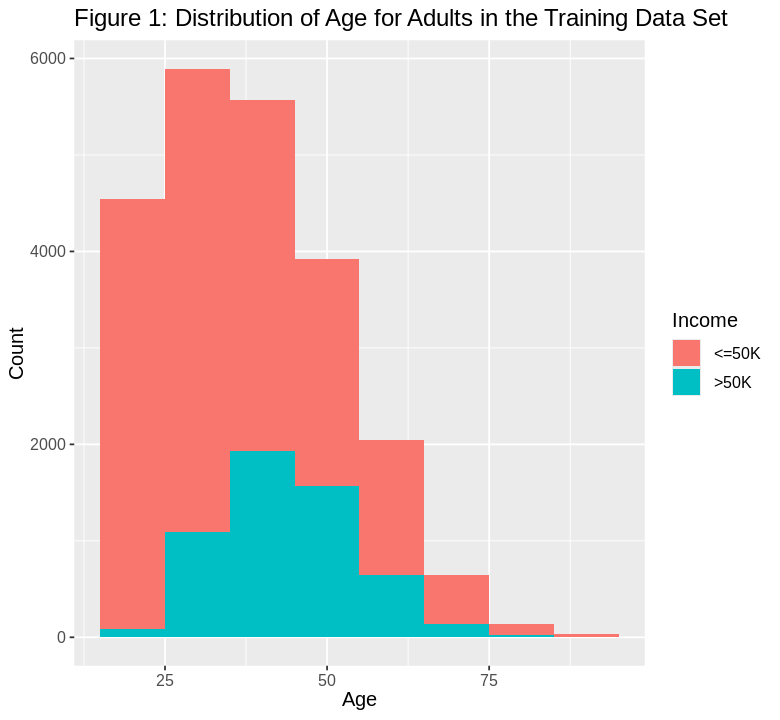

In [60]:
options(repr.plot.height = 6, repr.plot.width = 6.5)
age_histogram <- adult_training |> ggplot (aes (x = age, fill = income)) + 
              geom_histogram(binwidth = 10) + 
              labs(x = "Age", y = "Count", fill = "Income", title = "Figure 1: Distribution of Age for Adults in the Training Data Set") +
              theme (text = element_text (size = 12))
age_histogram

(Add interpretation here)

### B. Visualizing the distribution of education level

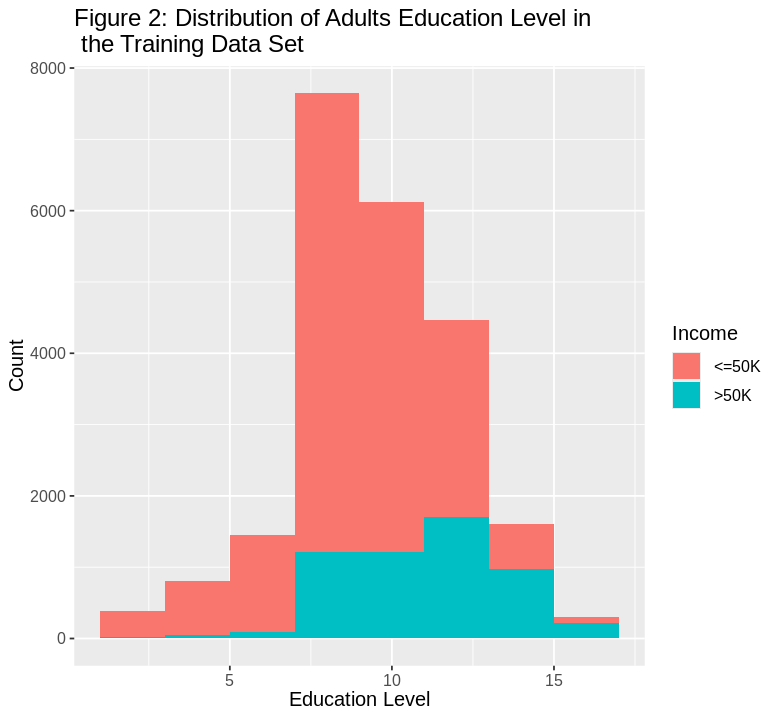

In [61]:
edu_histogram <- adult_training |> ggplot (aes (x = education_level, fill = income)) + 
              geom_histogram(binwidth = 2) + 
              labs(x = "Education Level", y = "Count", fill = "Income", title = "Figure 2: Distribution of Adults Education Level in \n the Training Data Set") +
              theme (text = element_text (size = 12))
edu_histogram

(Add interpretation here)

### C. Visualizing the distribution of capital gain

<ScaleContinuousPosition>
 Range:  
 Limits:    0 --    1

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message in scale_y_continuous(trans = "log"):
“log-2.718282 transformation introduced infinite values.”
Warning message:
“Removed 44 rows containing missing values or values outside the scale range
(`geom_bar()`).”


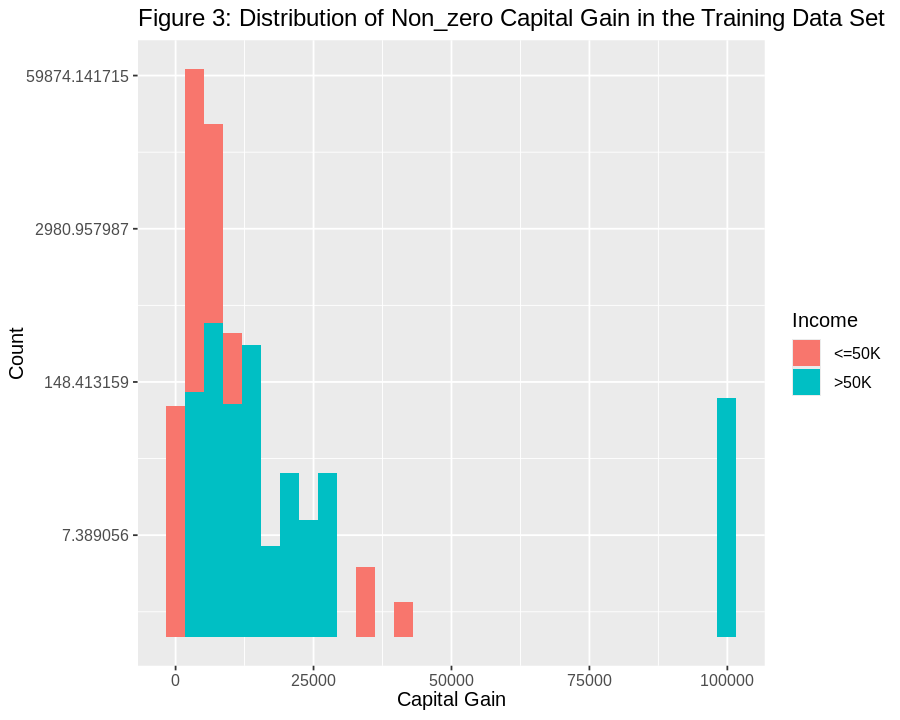

In [62]:
#Here the points of the y-axis and x_axis are far apart, and we need to zoom in on the image in the lower right corner to visualize the results.
options(repr.plot.height = 6, repr.plot.width = 7.5)
capital_gain_plot <- adult_training|>
      filter (capital_gain != 0)|>
      ggplot(aes(x = capital_gain, fill = income)) +
      geom_histogram() +
      labs(title = "Figure 3: Distribution of Non_zero Capital Gain in the Training Data Set",
           x = "Capital Gain",
           y = "Count",
           fill= "Income")+
        theme (text = element_text (size = 12))+
          scale_y_continuous(trans = 'log') 
          scale_x_continuous(trans = 'log')
capital_gain_plot 

(Add interpretation here)

### D. Visualizing the distribution of capital loss

<ScaleContinuousPosition>
 Range:  
 Limits:    0 --    1

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message in scale_y_continuous(trans = "log"):
“log-2.718282 transformation introduced infinite values.”
Warning message:
“Removed 26 rows containing missing values or values outside the scale range
(`geom_bar()`).”


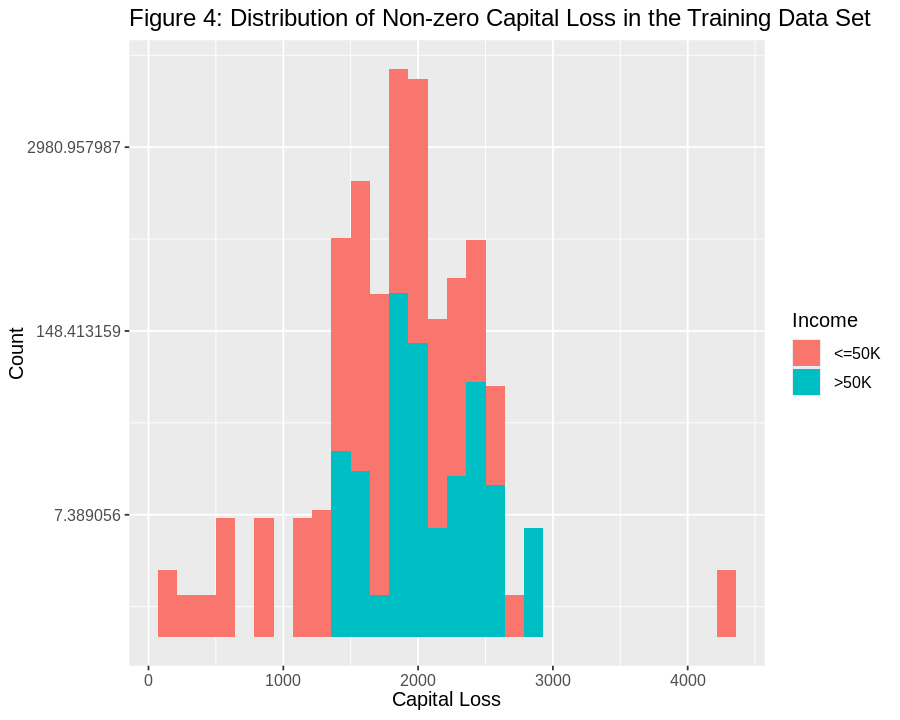

In [63]:
capital_loss_plot <- adult_training|>
      filter (capital_loss!= 0)|>
      ggplot(aes(x = capital_loss, fill = income)) +
      geom_histogram() +
      labs(title = "Figure 4: Distribution of Non-zero Capital Loss in the Training Data Set",
           x = "Capital Loss",
           y = "Count",
           fill= "Income")+
        theme (text = element_text (size = 12))+
          scale_y_continuous(trans = 'log') 
          scale_x_continuous(trans = 'log')
capital_loss_plot 

(Add interpretation here)

### E. Visualizing the distribution of weekly work hours

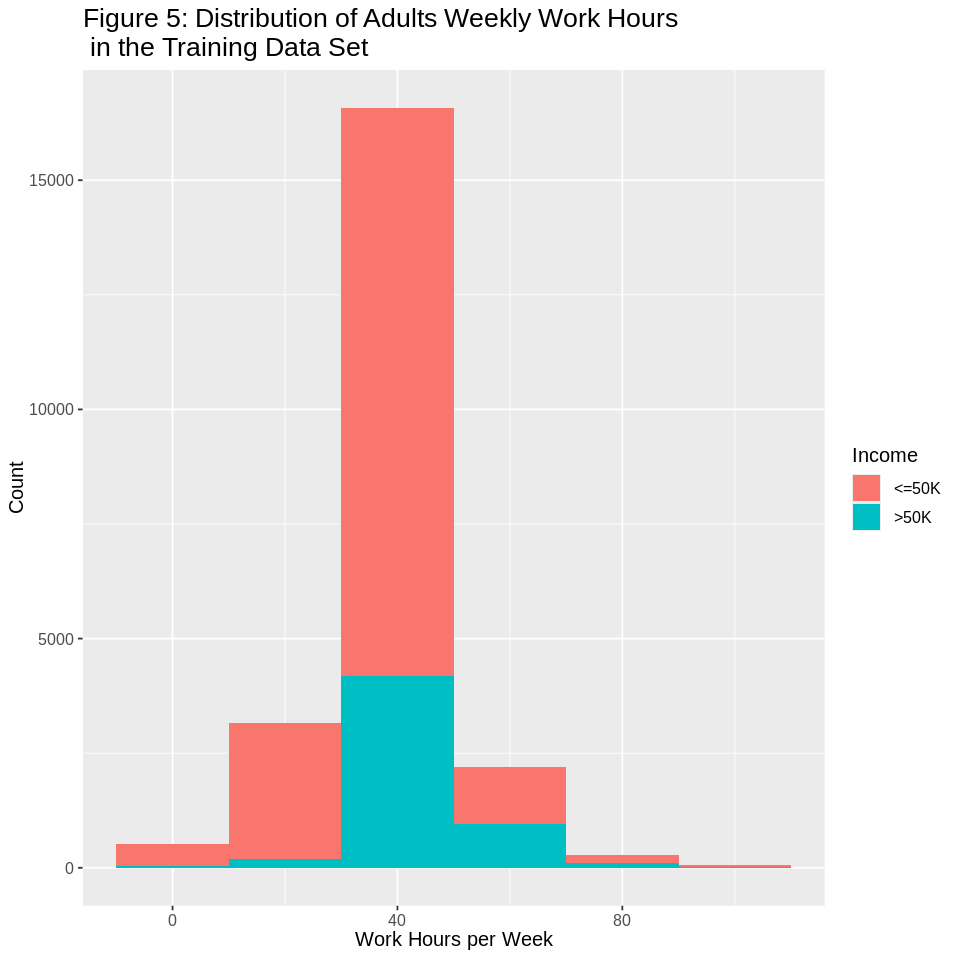

In [64]:
options(repr.plot.height = 8, repr.plot.width = 8)
weekly_work_hours_histogram <- adult_training |> 
              ggplot (aes (x = weekly_work_hours, fill = income)) + 
              geom_histogram(binwidth = 20) + 
              labs(x = "Work Hours per Week", y = "Count", fill = "Income", title = "Figure 5: Distribution of Adults Weekly Work Hours \n in the Training Data Set") +
              theme (text = element_text (size = 12),
              plot.title = element_text(size =16))
weekly_work_hours_histogram

(Add interpretation here)

## 2) Data Analysis

We create a binary classifier predicting whether one's income exceeds $ 50k by using the KNN classification. Our data set contains 15 columns, but we only select numerical parameters as the predictors.

- We use `age` as a predictor because we observed a higher prevalence of middle-aged people who earn more than  $ 50k in the exploratory data analysis, indicating the influence of age in determining one's income.
- We use `education_level`, `capital_gain`, `capital_loss`, and `weekly_work_hours` because the plots in the exploratory phase show positive relationships between each variable and `income`. For example, the positive relationship between `capital gain` and `income` can be seen in Figure 4 as all of the people with approximately `$`100,000 capital gain have more than `$`50k annual income.

So far, we have divided the data set into a training (70%) and testing set (30%) using `income` as the strata argument. Next, we use `tune()` to determine the best $K$, number of nearest neighbors. Finally, we proceed with the regular procedure in performing the KNN classification.

(word count = 166)

### i. Creating KNN Recipe, Tuning Model, and Workflow

Our first step is to find the number of nearest neighbors $K$ to maximize the performance of our classifier by doing cross-validation with 5 folds. We continue by creating a recipe that will be used in the entire project followed by creating the tuning of our model. Finally, using a workflow, we collect our matrix that describes the level of accuracy for various $K$ values. We can decide the value of $K$ for the classifier by visualizing and finding the peak of the graph that shows the relationship between accuracy and $K$.

(Word count = 92)

In [72]:
set.seed(3278)
# Peforming cross-validation with 5 folds.
adult_vfold <- vfold_cv(adult_training, v = 5, strata = income)

# Creating the recipe.
# We scale and center all predictors so that each variable contributes equally as a predictor in our classification model.
adult_recipe <- recipe(income ~. , data = adult_training) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())

# Creating the tuning model.
knn_tune <- nearest_neighbor (weight_func = 'rectangular', neighbors = tune()) |> 
            set_engine('kknn') |>
            set_mode ('classification')

# Creating a workflow that combines the recipe and the model specification. 
# We choose grid = 10 in this process.
knn_results <- workflow() |>
       add_recipe(adult_recipe) |>
       add_model(knn_tune) |>
       tune_grid(resamples = adult_vfold, grid = 20) |>
       collect_metrics()

**Table 5: Metric Results of the Classification Model**

In [83]:
head(knn_results)

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7983416,5,0.002094454,Preprocessor1_Model01
1,roc_auc,binary,0.6566676,5,0.001384666,Preprocessor1_Model01
2,accuracy,binary,0.7993507,5,0.001431003,Preprocessor1_Model02
2,roc_auc,binary,0.7023182,5,0.002759858,Preprocessor1_Model02
3,accuracy,binary,0.8126889,5,0.001450540,Preprocessor1_Model03
3,roc_auc,binary,0.7258021,5,0.002567352,Preprocessor1_Model03


### ii. Determining the Value of $K$

We filter `knn_results` and only keep the rows for which the `.metric` column equals `accuracy`.

(Word count = 15)

**Table 6: Accuracy obtained from various $K$ values.**

In [79]:
accuracies <- knn_results |> 
       filter(.metric == 'accuracy')
head(accuracies)

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7983416,5,0.002094454,Preprocessor1_Model01
2,accuracy,binary,0.7993507,5,0.001431003,Preprocessor1_Model02
3,accuracy,binary,0.8126889,5,0.001450540,Preprocessor1_Model03
4,accuracy,binary,0.8137421,5,0.001420040,Preprocessor1_Model04
5,accuracy,binary,0.8150583,5,0.001764852,Preprocessor1_Model05
6,accuracy,binary,0.8159797,5,0.001688404,Preprocessor1_Model06


Next, we visualize the accuracy as a function of the number of neighbors by using a line graph.

(Word count = 18)

Warning message:
“Removed 7 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 7 rows containing missing values or values outside the scale range
(`geom_line()`).”


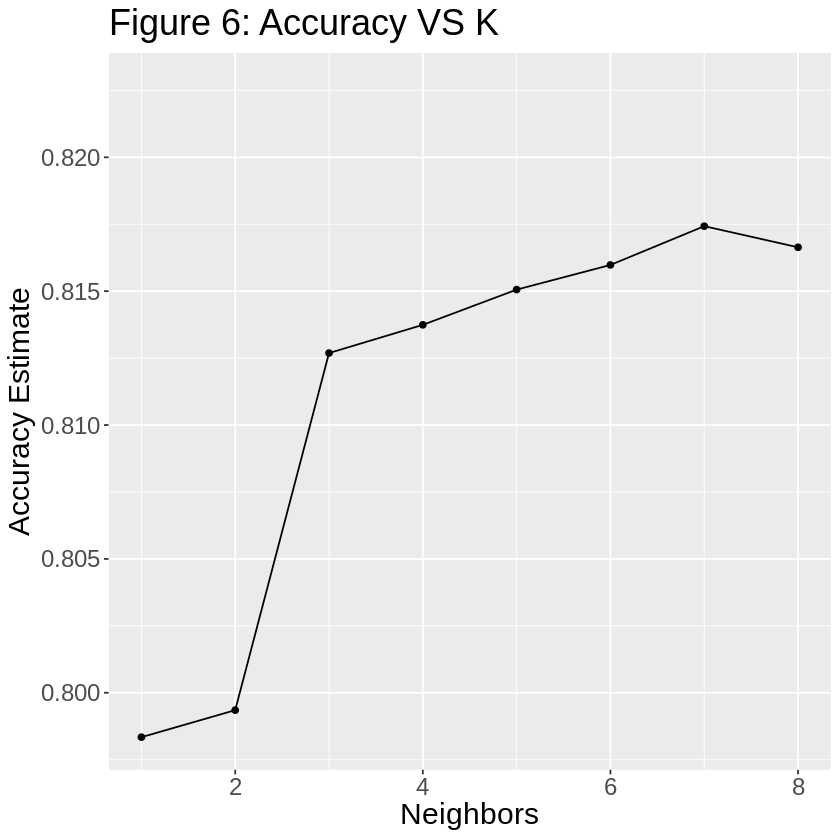

In [82]:
options(repr.plot.height = 7, repr.plot.width = 7)
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate", title = "Figure 6: Accuracy VS K")+
       scale_x_continuous(limits = c(1, 8)) +
       theme (text = element_text (size = 18))
accuracy_versus_k

From the graph above, the maximum accuracy is attained for $K=7$. Therefore, we will continue building our classifier using this value.

(Word count = 21)

### iii. Finalizing the Classifier Model

In [85]:
# Creating a new tuning model with K = 7.
knn_final_tune <- nearest_neighbor (weight_func = 'rectangular', neighbors = 7) |> 
            set_engine('kknn') |>
            set_mode ('classification')

# Fitting the model to the training dataset
adult_fit <- workflow() |>
       add_recipe(adult_recipe) |>
       add_model(knn_final_tune) |>
       fit(data = adult_training)

adult_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(7,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1691457
Best kernel: rectangular
Best k: 7

### iv. Assessing Model Accuracy 

After developing our classifier, we would like to investigate its accuracy in making predictions corresponding to the training dataset.

(Word count = 19)

**Table 7: Accuracy of the Classifier**

In [86]:
adult_predictions <- predict(adult_fit, adult_testing) |>
    bind_cols(adult_testing)

adult_accuracy <- adult_predictions |>
    metrics(truth = income, estimate = .pred_class) |>
    filter(.metric == "accuracy") |>
    select(-.estimator)

adult_accuracy

.metric,.estimate
<chr>,<dbl>
accuracy,0.8151295


Apparently, our model is 81.5% accurate. This is not a bad value but we would expect to achieve a higher accuracy to better distinguish between middle-class and high-income groups in the US. (More comments on this part is welcomed).

## 3) Data Visualization

# III. Discussion

# IV. References

- Dechadilok, C., & Suksawang, P. (2017). Effect of marketing communication on income levels and lottery purchasing behavior in central thailand. Review of Integrative Business and Economics Research, 6(4), 15-27.
- 
Larrimore, J., Burkhauser, R. V., Auten, G., & Armour, P. (2021). Recent trends in US income distributions in tax record data using more comprehensive measures of income including real accrued capital gains. The Journal of Political Economy, 129(5), 1319-1360. https://doi.org/10.1086/713098